In [1]:
from tensorflow import keras

base_model = keras.applications.VGG16(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(224, 224, 3),
    include_top=False)

In [2]:
base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [3]:
base_model.trainable = False

In [4]:
inputs = keras.Input(shape=(224, 224, 3))
# Separately from setting trainable on the model, we set training to False
x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
# A Dense classifier with a single unit (binary classification)
outputs = keras.layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

In [5]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,715,201 (56.13 MB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [7]:
model.compile(loss=keras.losses.BinaryCrossentropy(from_logits=True), metrics=[keras.metrics.BinaryAccuracy()])

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# create a data generator
datagen = ImageDataGenerator(
        samplewise_center=True,  # set each sample mean to 0
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False) # we don't expect Bo to be upside-down so we will not flip vertically

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# load and iterate training dataset
train_it = datagen.flow_from_directory('/content/drive/MyDrive/cars',
                                       target_size=(224, 224),
                                       color_mode='rgb',
                                       class_mode='binary',
                                       batch_size=8)
# load and iterate validation dataset
valid_it = datagen.flow_from_directory('/content/drive/MyDrive/cars_test',
                                      target_size=(224, 224),
                                      color_mode='rgb',
                                      class_mode='binary',
                                      batch_size=8)
labels=[]
labels.append(0)

print(labels)

Found 218 images belonging to 2 classes.
Found 37 images belonging to 2 classes.
[0]


In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_it, steps_per_epoch=15, validation_data=valid_it, validation_steps=4, epochs=10)


Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 89s 6s/step - accuracy: 0.4728 - loss: 5.7503e-08 - val_accuracy: 0.4062 - val_loss: 5.5879e-08
Epoch 2/10
13/15 ━━━━━━━━━━━━━━━━━━━━ 9s 5s/step - accuracy: 0.3798 - loss: 5.8719e-08 

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


15/15 ━━━━━━━━━━━━━━━━━━━━ 62s 4s/step - accuracy: 0.3805 - loss: 5.8837e-08 - val_accuracy: 0.4000 - val_loss: 4.7684e-08
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 92s 6s/step - accuracy: 0.3005 - loss: 6.2625e-08 - val_accuracy: 0.4062 - val_loss: 5.2154e-08
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 62s 4s/step - accuracy: 0.3779 - loss: 6.4820e-08 - val_accuracy: 0.2000 - val_loss: 7.1526e-08
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 135s 6s/step - accuracy: 0.3425 - loss: 5.6174e-08 - val_accuracy: 0.4062 - val_loss: 5.9605e-08
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 61s 4s/step - accuracy: 0.3277 - loss: 7.2306e-08 - val_accuracy: 0.8000 - val_loss: 2.3842e-08
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 143s 6s/step - accuracy: 0.3956 - loss: 4.8004e-08 - val_accuracy: 0.5000 - val_loss: 5.5879e-08
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 62s 4s/step - accuracy: 0.3105 - loss: 6.2478e-08 - val_accuracy: 0.4000 - val_loss: 4.7684e-08
Epoch 9/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 87s 6s/step - accuracy: 0.3193 - 

In [17]:
import numpy as np
!pip install keras_applications
import warnings
from keras.models import Model
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import GlobalMaxPooling2D
from keras.layers import GlobalAveragePooling2D
from keras.preprocessing import image
from tensorflow.python.keras.utils import layer_utils
from keras.utils import get_file
from keras import backend as X
from keras.applications.imagenet_utils import decode_predictions
from keras.applications.imagenet_utils import preprocess_input
from keras_applications.imagenet_utils import _obtain_input_shape

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 1.5 MB/s eta 0:00:00


In [18]:
import tensorflow as tf

(1, 224, 224, 3)


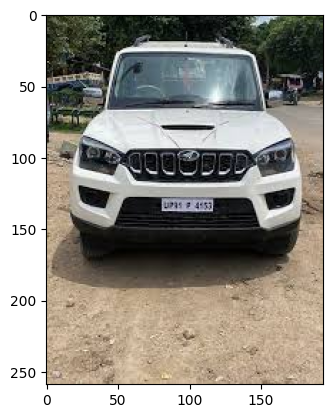

In [23]:
from matplotlib.pyplot import imread,imshow
from tensorflow.keras.utils import load_img, img_to_array
import keras
img_path='/content/drive/MyDrive/cars/front/101 - Copy - Copy.jpg'
img=keras.utils.load_img(img_path,target_size=(224,224))
x=keras.utils.img_to_array(img)
x=np.expand_dims(x,axis=0)
x=preprocess_input(x)
print(x.shape)
my_image=imread(img_path)
imshow(my_image)

In [24]:
model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([[8.078934]], dtype=float32)

In [25]:
!pip install pyyaml h5py


In [26]:
import os

import tensorflow as tf
from tensorflow import keras

print(tf.version.VERSION)


2.16.1


In [28]:
model.save("image_classification.keras")

In [33]:
import streamlit as st
import tensorflow as tf
from tensorflow.keras.applications.imagenet_utils import decode_predictions
import cv2
from PIL import Image, ImageOps
import numpy as np

In [52]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
from tensorflow.keras.applications.imagenet_utils import decode_predictions
import cv2
from PIL import Image, ImageOps
import numpy as np

@st.cache(allow_output_mutation=True)
def load_model():
  model=tf.keras.models.load_model('/content/image_classification.keras')
  return model
with st.spinner('Model is being loaded..'):
  model=load_model()

st.write("""
         # Image Classification
         please only upload images of jpg format
         """
         )

file = st.file_uploader("Upload the image to be classified U0001F447", type=["jpg", "png"])
st.set_option('deprecation.showfileUploaderEncoding', False)

def upload_predict(upload_image, model):

        size = (224,224)
        image = ImageOps.fit(upload_image, size, Image.ANTIALIAS)
        image = np.asarray(image)
        img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        img_resize = cv2.resize(img, dsize=(224, 224),interpolation=cv2.INTER_CUBIC)

        img_reshape = img_resize[np.newaxis,...]

        prediction = model.predict(img_reshape)


        return prediction
if file is None:
    st.text("Please upload an image file")
else:
    image = Image.open(file)
    st.image(image, use_column_width=True)
    predictions = upload_predict(image, model)
    if(predictions[0]>0):
      st.write("its the rear view of the car")
      st.write("if u think the result is incorrect try using a better resolution image")
    else:
      st.write("its front view of a car")
      st.write("if u think the result is incorrect try using a better resolution image")


Overwriting app.py


In [55]:
! streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.106.168.159:8501

npx: installed 22 in 3.113s
your url is: https://vast-items-double.loca.lt
2024-06-01 15:03:47.415341: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 4 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
2024-06-01 15:03:51.293 `st.cache` is deprecated. Please use one of Streamlit's new caching commands,
`st.cache_data` or `st.cache_resource`.

More information [in our docs](https://docs.streamlit.io/library/advanced-features/caching).
2024-06-01 15:03:51.296 
════════════════════════════════════════════════
deprecation.showfileUploaderEncoding IS 

In [48]:
!npx localtunnel --port 8501

npx: installed 22 in 1.544s
your url is: https://icy-parks-lick.loca.lt
^C


In [47]:
!curl https://loca.lt/mytunnelpassword

34.106.168.159